<a href="https://colab.research.google.com/github/mirsaidl/OpenCV/blob/main/brighten_conv_blurring_sharpening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imshow(title='Image', image=None, size=10):
    w, h = image.shape[0], image.shape[1]
    ratio = w/h
    plt.figure(figsize=(ratio * size, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

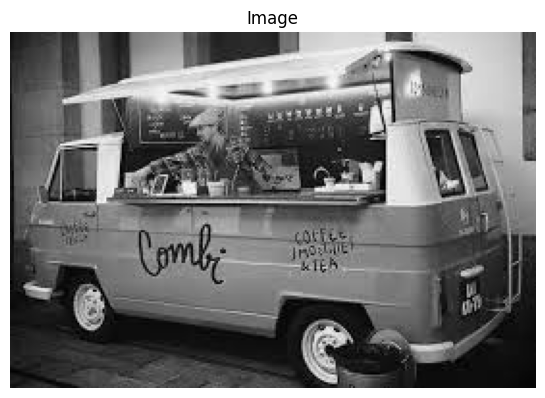

In [4]:
image = cv2.imread('/content/images - 2024-03-25T235701.970.jpg', 0) # grayscaled
imshow('Image', image)

### Arithmetic and Bitwise operations


In [5]:
M = np.ones(image.shape, dtype="uint8") * 100
print(M)

[[100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 ...
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]]


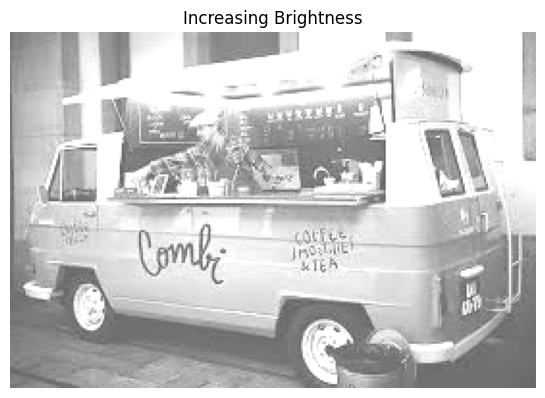

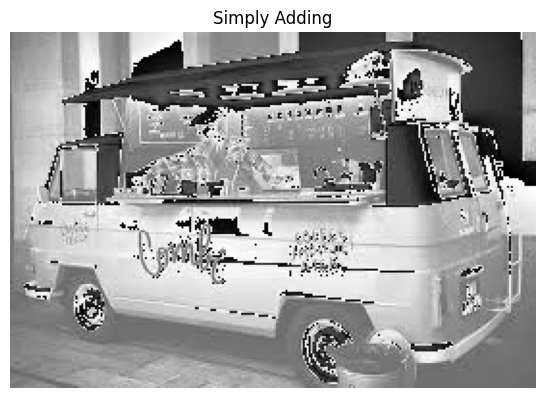

In [8]:
# With cv2
added = cv2.add(image, M)
imshow("Increasing Brightness", added)
# With just add
added_ = image + M
imshow("Simply Adding", added_)

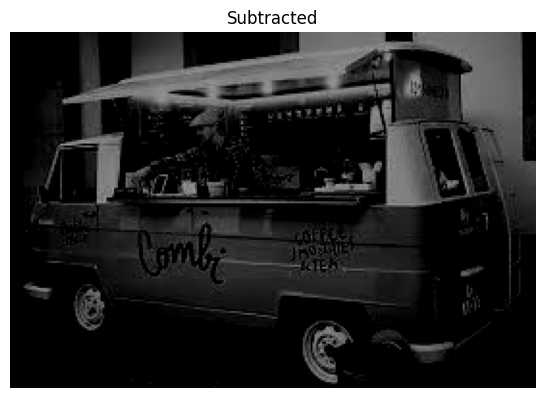

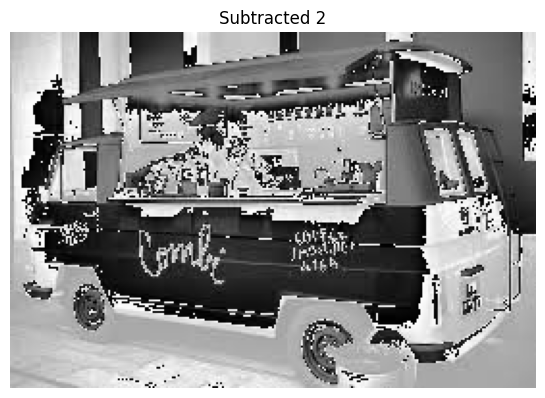

In [9]:
# Decreasing Brightness
subtracted = cv2.subtract(image, M)
imshow("Subtracted", subtracted)

subtracted2 = image - M
imshow("Subtracted 2", subtracted2)

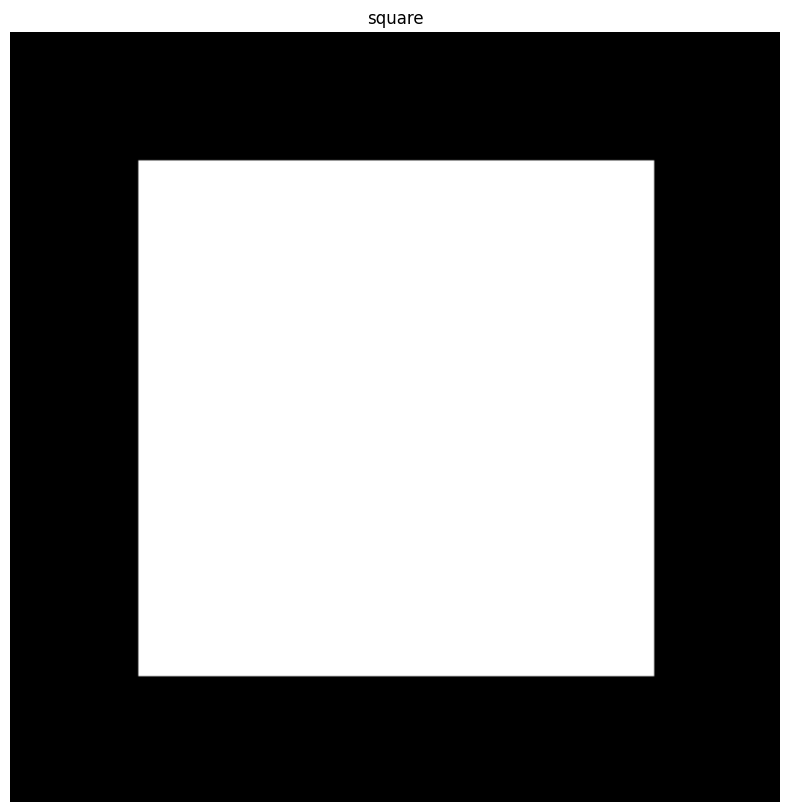

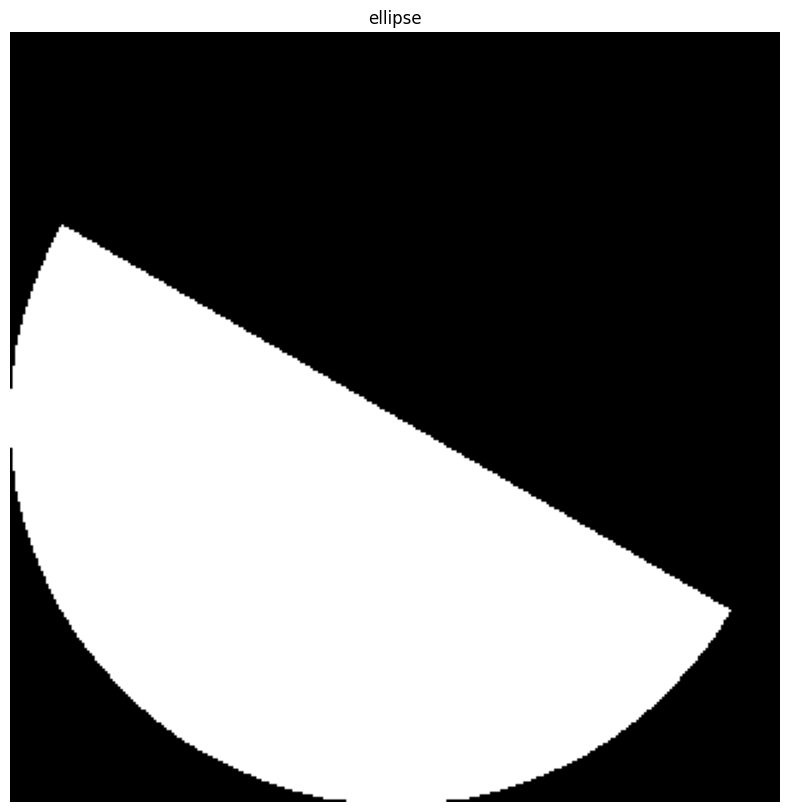

In [10]:
# Making a square
square = np.zeros((300, 300), np.uint8)
cv2.rectangle(square, (50, 50), (250, 250), 255, -2)
imshow("square", square)

# Making a ellipse
ellipse = np.zeros((300, 300), np.uint8)
cv2.ellipse(ellipse, (150, 150), (150, 150), 30, 0, 180, 255, -1)
imshow("ellipse", ellipse)

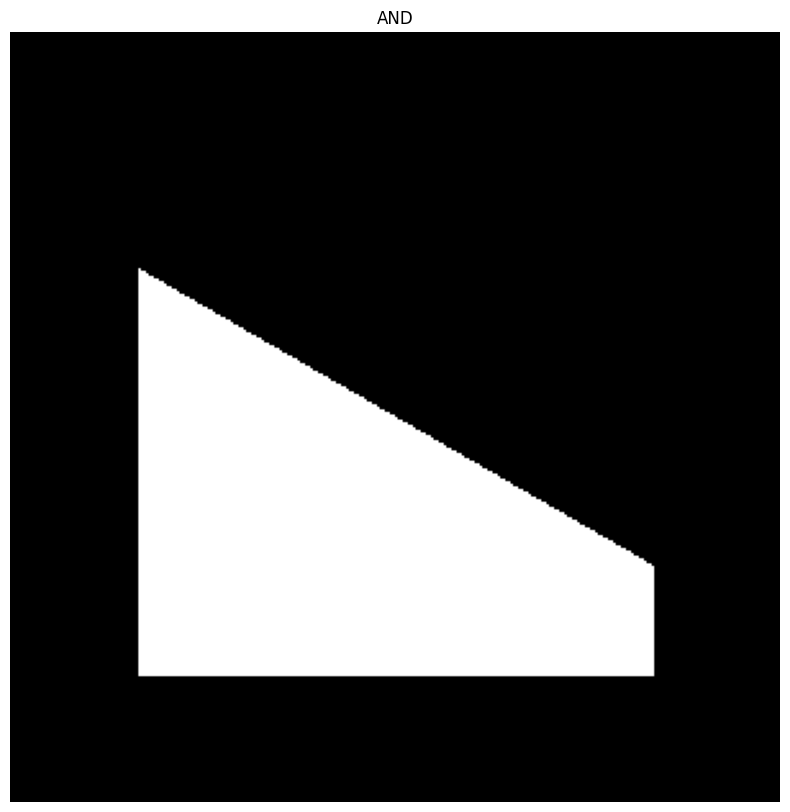

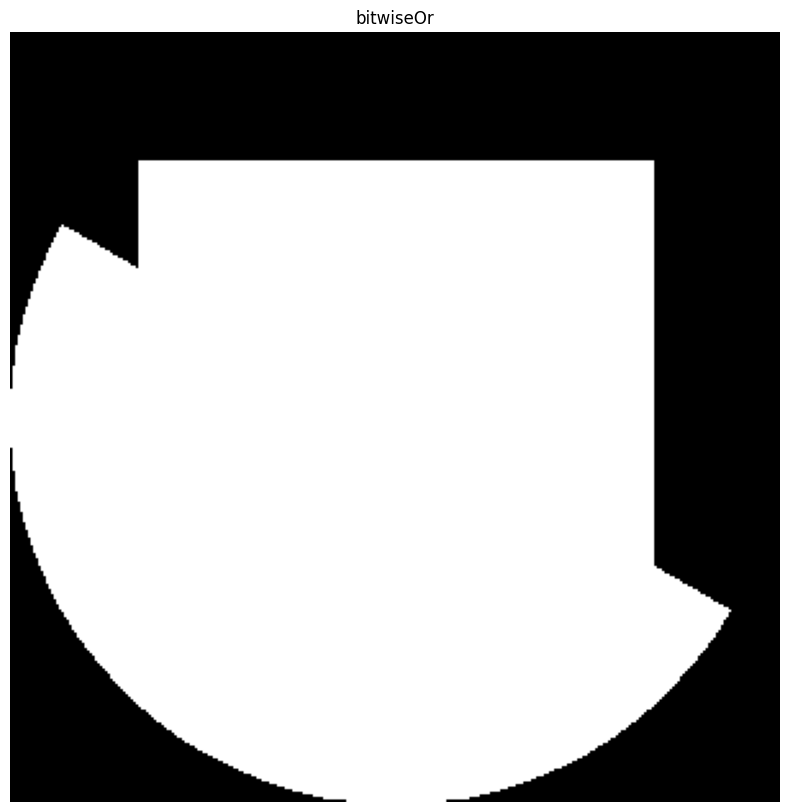

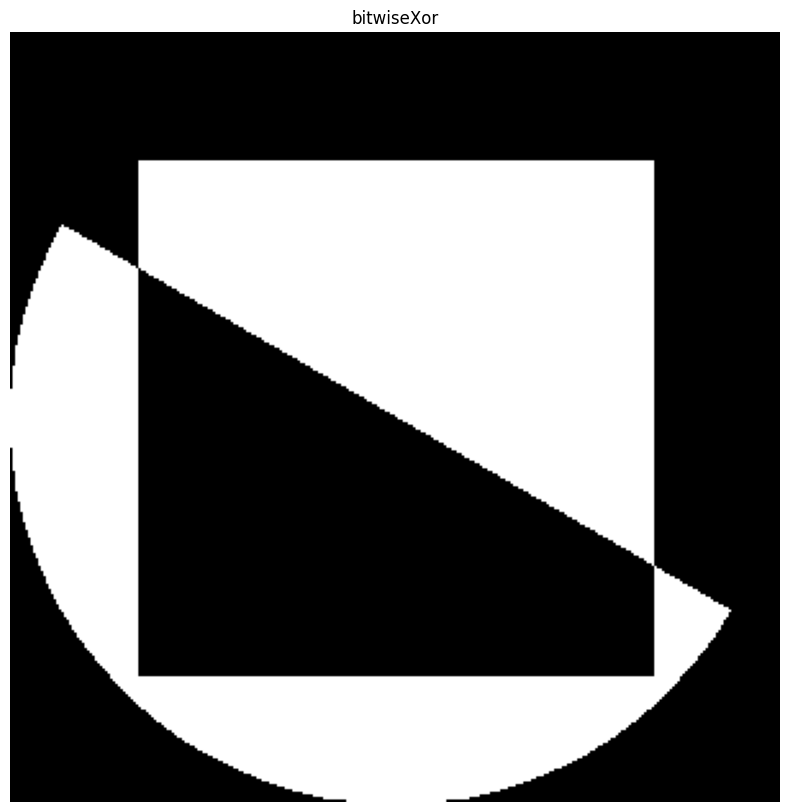

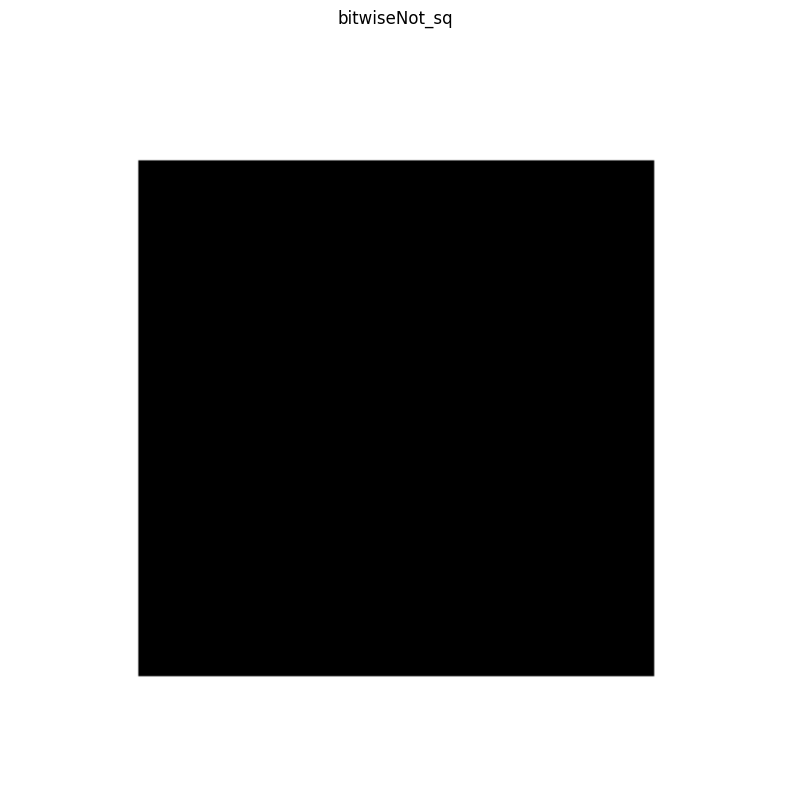

In [11]:
And = cv2.bitwise_and(square, ellipse)
imshow("AND", And)

# Shows where either square or ellipse is
bitwiseOr = cv2.bitwise_or(square, ellipse)
imshow("bitwiseOr", bitwiseOr)

# Shows where either exist by itself
bitwiseXor = cv2.bitwise_xor(square, ellipse)
imshow("bitwiseXor", bitwiseXor)

# Shows everything that isn't part of the square
bitwiseNot_sq = cv2.bitwise_not(square)
imshow("bitwiseNot_sq", bitwiseNot_sq)

# Notice the last operation inverts the image totally

# **CONV, Blurring, Sharpenning**

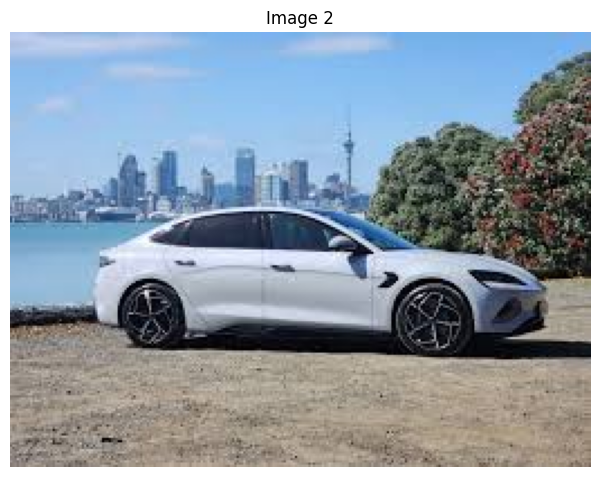

In [13]:
image = cv2.imread('/content/1.jpg')
imshow('Image 2', image)

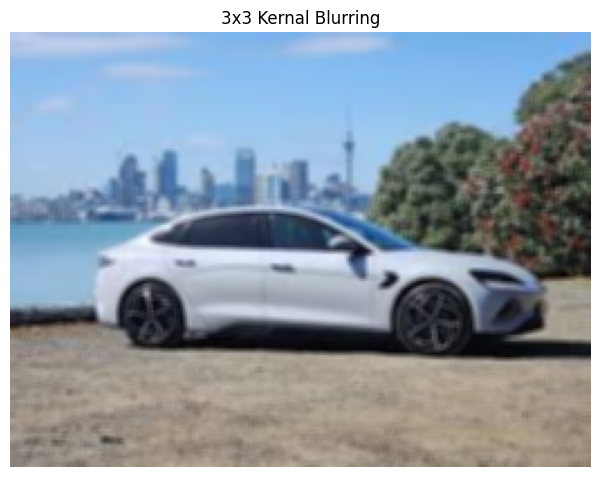

In [21]:
# Blurring using Convolutions
kernel_3x3  = np.ones((3,3), np.float32) / 9

blurred = cv2.filter2D(image, -1, kernel_3x3)
imshow('3x3 Kernal Blurring', blurred)

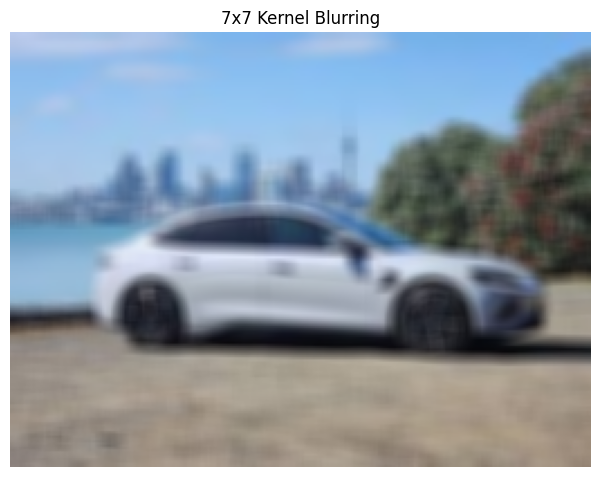

In [33]:
kernel_7x7 = np.ones((7,7), np.float32) / 49
blurred2 = cv2.filter2D(image, -1, kernel_7x7)
imshow('7x7 Kernel Blurring', blurred2)

### **Other commonly used blurring methods in OpenCV**
- Regular Blurring
- Gaussian Blurring
- Median Blurring

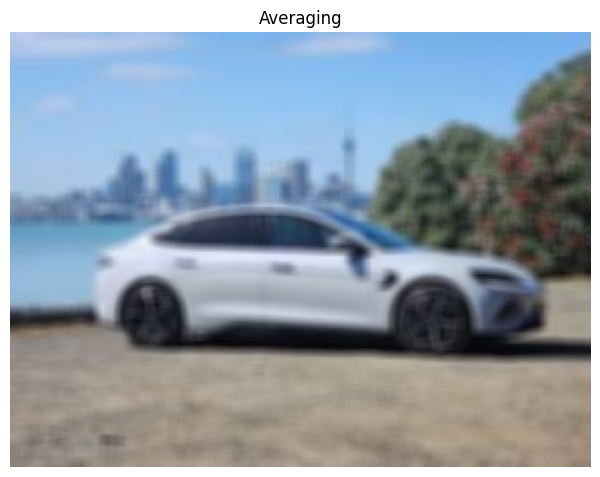

In [36]:
blur = cv2.blur(image, (5,5))
imshow('Averaging', blur)

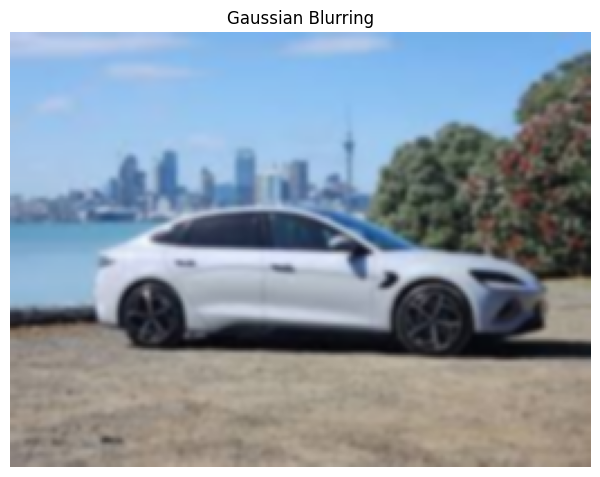

In [37]:
gaussian = cv2.GaussianBlur(image, (5,5), 0)
imshow('Gaussian Blurring', gaussian)

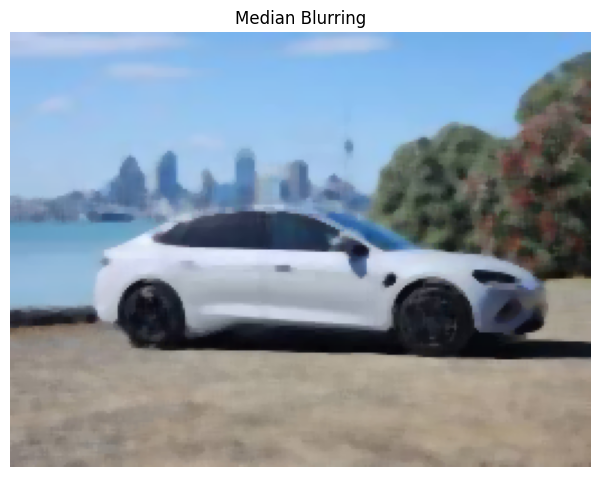

In [39]:
median = cv2.medianBlur(image, 5)
imshow('Median Blurring', median)

### **Bilateral Filter**
#### ```dst = cv.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])```

- **src**	Source 8-bit or floating-point, 1-channel or 3-channel image.
- **dst**	Destination image of the same size and type as src .
- **d**	Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.
- **sigmaColor**	Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.
- **sigmaSpace**	Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.
- **borderType**	border mode used to extrapolate pixels outside of the image

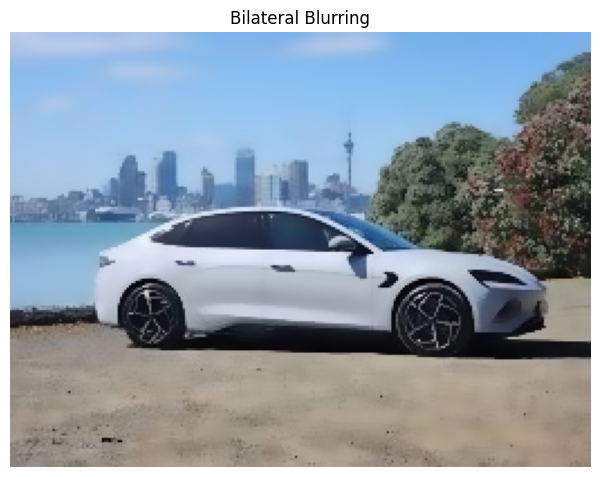

In [41]:
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
imshow('Bilateral Blurring', bilateral)

## **Image De-noising - Non-Local Means Denoising**

**There are 4 variations of Non-Local Means Denoising:**

- cv2.fastNlMeansDenoising() - works with a single grayscale images
- cv2.fastNlMeansDenoisingColored() - works with a color image.
- cv2.fastNlMeansDenoisingMulti() - works with image sequence captured in short period of time (grayscale images)
- cv2.fastNlMeansDenoisingColoredMulti() - same as above, but for color images.

```fastNlMeansDenoisingColored(InputArray src, OutputArray dst, float h=3, float hColor=3, int templateWindowSize=7, int searchWindowSize=21 )¶```

#### Parameters for fastNlMeansDenoisingColored:

- **src** – Input 8-bit 3-channel image.
- **dst** – Output image with the same size and type as src .
templateWindowSize – Size in pixels of the template patch that is used to compute weights. Should be odd. Recommended value 7 pixels
- **searchWindowSize** – Size in pixels of the window that is used to compute weighted average for given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater denoising time. Recommended value 21 pixels
- **h** – Parameter regulating filter strength for luminance component. Bigger h value perfectly removes noise but also removes image details, smaller h value preserves details but also preserves some noise
- **hColor** – The same as h but for color components. For most images value equals 10 will be enought to remove colored noise and do not distort colors

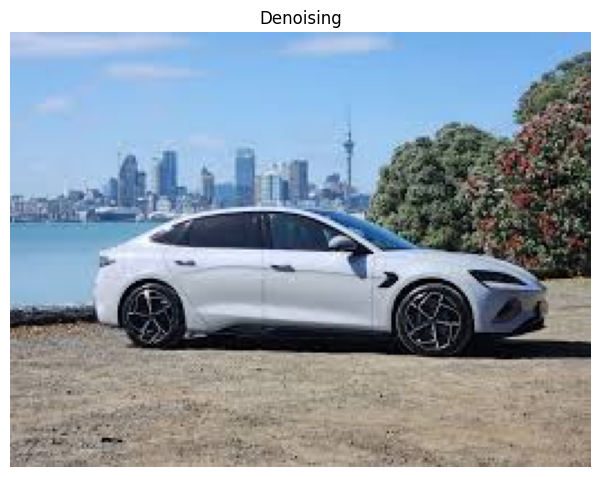

In [42]:
dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)
imshow('Denoising', image)

### Sharpening


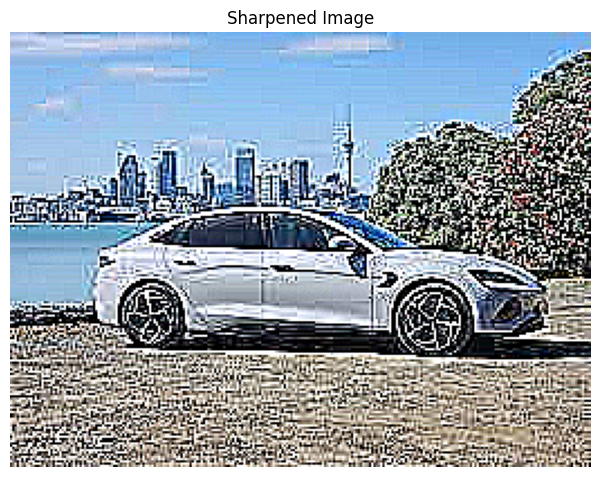

In [50]:
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1,9,-1],
                              [-1,-1,-1]])
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
imshow('Sharpened Image', sharpened)